0.25228711286367916


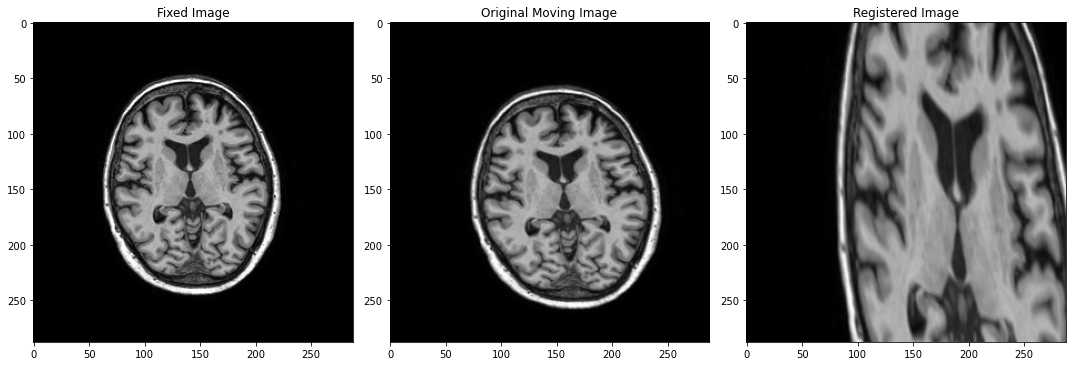

In [3]:
import sys
import project1
sys.path.append('code')  # go up one folder, then into code
import registration_util as util
import registration as reg
import matplotlib.pyplot as plt
import numpy as np

X_fixed= 'image_data/3_2_t1.tif'
X_move= 'image_data/3_2_t1_d.tif'

X, Xm = util.cpselect(X_fixed, X_move)

Xh = util.c2h(X)
Xmh = util.c2h(Xm)

# Step 2: Compute the affine transformation matrix
A = reg.ls_affine(Xh, Xmh)

I_fixed = plt.imread(X_fixed)
I_move = plt.imread(X_move)

# Step 5: Apply the affine transformation
I_registered, Xt = reg.image_transform(I_move, A, output_shape=None)

# Step 6: Display results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Fixed Image")
plt.imshow(I_fixed, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Original Moving Image")
plt.imshow(I_move, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Registered Image")
plt.imshow(I_registered, cmap='gray')

print(reg.correlation(I_fixed, I_registered))

plt.tight_layout()
plt.show()



# Task 2

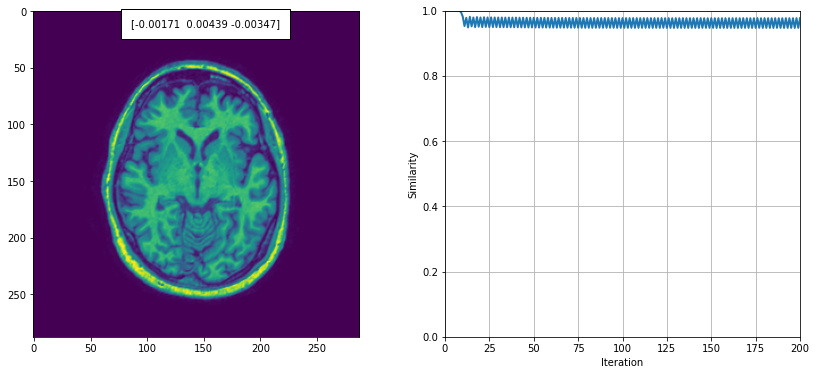

In [3]:
#Rigid intensity-based registration of two T1 slices 
#(e.g. 1_1_t1.tif and 1_1_t1_d.tif) using normalized 
#cross-correlation as a similarity measure.

s1 = "1_1_t1"
s2 = "1_1_t1_d"

project1.intensity_based_registration_rigid(s1, s2);

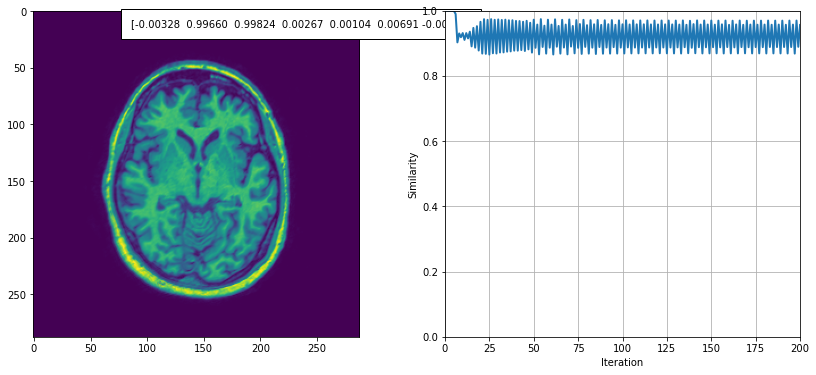

In [4]:
#Affine intensity-based registration of two T1 slices 
#(e.g. 1_1_t1.tif and 1_1_t1_d.tif) using normalized 
#cross-correlation as a similarity measure.

project1.intensity_based_registration_affine("1_1_t1", "1_1_t1_d")

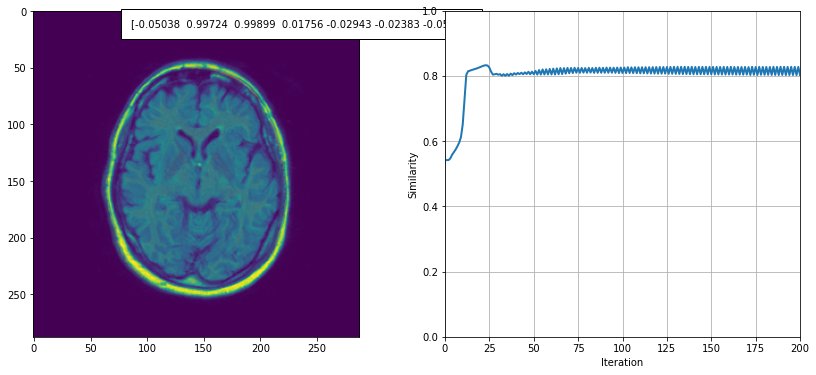

In [5]:
#Affine intensity-based registration of a T1 and a T2 slice 
#(e.g. 1_1_t1.tif and 1_1_t2.tif) using normalized 
#cross-correlation as a similarity measure.

project1.intensity_based_registration_affine("1_1_t1", "1_1_t2")

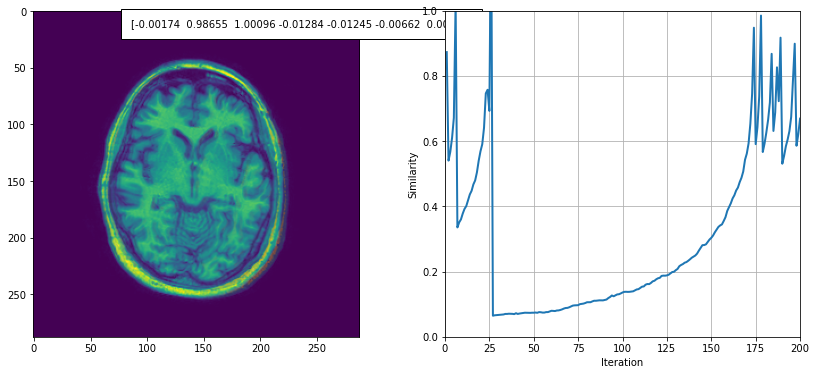

In [6]:
#Affine intensity-based registration of two T1 slices 
#(e.g. 1_1_t1.tif and 1_1_t1_d.tif) using mutual information 
#as a similarity measure.

project1.intensity_based_registration_affine_mi("1_1_t1", "1_1_t1_d")

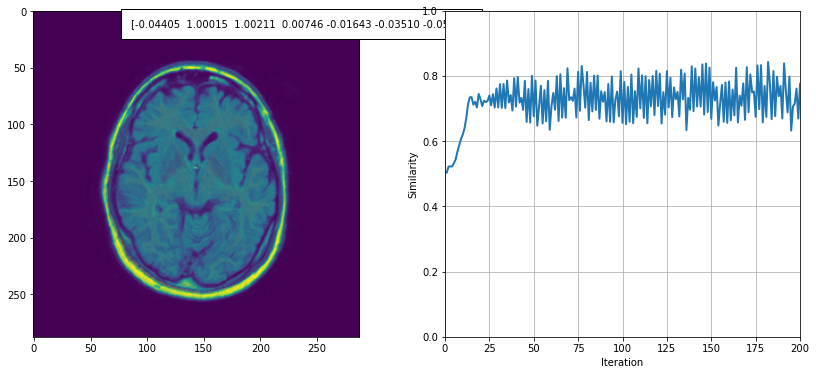

In [7]:
#Affine intensity-based registration of a T1 slice and a T2 slice 
#(e.g. 1_1_t1.tif and 1_1_t2.tif) using mutual information as a 
#similarity measure.

project1.intensity_based_registration_affine_mi("1_1_t1", "1_1_t2")

# Open ended project work

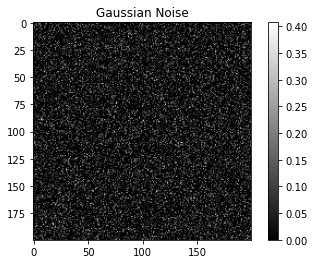

In [ ]:
noise_im = project1.gauss_noise_gen(0,0.1,np.zeros((200, 200)))

plt.imshow(noise_im, cmap='gray')
plt.title("Gaussian Noise")
plt.colorbar()
plt.show()